# Name: Sagar Suryakant Dhuri
# Task 1: Stock Prediction

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_train=pd.read_csv('C:/Users/Admin/Downloads/Bharat Intern T1/Google_Stock_Price_Train.csv')

In [3]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
train_set=df_train.iloc[:,1:2].values
print(df_train)
print(df_train.shape)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]
(1258, 6)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) 
scaled_train_set=scaler.fit_transform(train_set)
scaled_train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(scaled_train_set[i-60:i,0])
    y_train.append(scaled_train_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)

In [8]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [9]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [10]:
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.layers import Dropout


In [11]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [34]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 83ms/step - loss: 0.0030
Epoch 2/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0024
Epoch 3/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0024
Epoch 4/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0023
Epoch 5/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0025
Epoch 6/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0023
Epoch 7/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0025
Epoch 8/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0033
Epoch 9/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0022
Epoch 10/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0020
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0021
Epoch 12/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0020
Epoch 13/100
38/38 [====

In [36]:
df_test=pd.read_csv('C:/Users/Admin/Downloads/Bharat Intern T1/Google_Stock_Price_Train.csv')
a_s_p=df_test.iloc[:,1:2].values

In [41]:
df_total=pd.concat((df_train['Open'],df_test['Open']),axis=0) 
inputs=df_total[len(df_total)-len(df_test)-60].values 

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
features_set=[]
X_test=[]
for i in range(60,80):
    features_set.append(inputs[i-60:i,0])


In [42]:
features_set,X_test=(scaled_train_set),np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],1)) 
X_test

array([], shape=(0, 1), dtype=float64)

In [43]:
predicted_stock_price=regressor.predict(features_set)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

40/40 [==============================] - 0s 3ms/step


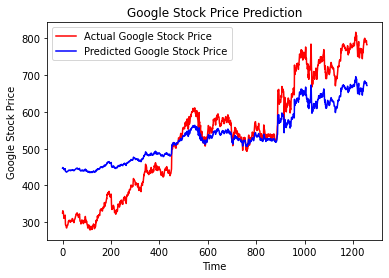

In [44]:
plt.plot(a_s_p,color='red',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

# Conclusion

As you can see above, the model can predict the trend of the actual stock prices very closely. 
The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.
The stock market plays a remarkable role in our daily lives. It is a significant factor in a country's GDP growth.